# Utilisation de la classification pour traiter la détection de fraude

In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

In [2]:
data = pd.read_csv(r"C:\Users\lahat\Documents\M2IMSD\Formation_ML_Udemy\arbre_decision_classification\prediction_de_fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [53]:
data.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [11]:
X = data.drop("isFraud", axis=1).values

In [12]:
target = data["isFraud"].values

In [13]:
labEnc_X = LabelEncoder()
X[:,1] = labEnc_X.fit_transform(X[:,1])
X[:,3] = labEnc_X.fit_transform(X[:,3])
X[:,6] = labEnc_X.fit_transform(X[:,6])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42, stratify = target)

In [ ]:
# Implémenter le modèle

In [42]:
decTree = DecisionTreeClassifier(criterion= 'gini', random_state=50)

In [43]:
# Enfin, nous ajustons les données sur les données d'entrainement
decTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [44]:
# évaluons sa précision sur les données de test.
decTree.score(X_test, y_test)

0.9992869992283643

In [45]:
y_pred = decTree.predict(X_test)

In [46]:
# Evalution avec Matrice de Confusion 
cm = confusion_matrix(y_test, y_pred)
cm

array([[425153,    130],
       [   174,    910]], dtype=int64)

In [54]:
# min samples leaf : nombre minimal de points devant être présent sur les noeuds de feuilles
grid_params = {
    "max_depth" : [1,2,3,4,5,6], 
    "min_samples_leaf" : [0.02, 0.04, 0.06, 0.08]
}

In [55]:
#ous créons un GridSearchCVobjet avec le classifieur de l’arbre de décision comme estimateur
grid_object = GridSearchCV(estimator = decTree, param_grid = grid_params, scoring = 'accuracy', cv = 10)

In [56]:
#Nous ajustons ensuite cet objet de grille aux données d'apprentissage
grid_object.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=50,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                     

In [58]:
#Extraction des meilleures parametres
grid_object.best_params_

{'max_depth': 1, 'min_samples_leaf': 0.02}

# Visualisation de l'arbre de décision

In [59]:
#Initialisation du classifieur DT
decTree_2 = DecisionTreeClassifier(criterion = 'gini', random_state = 50, max_depth= 2, min_samples_leaf=0.02)

In [60]:
# Adapter le classificateur aux données
decTree_2.fit(X, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.02, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [61]:
#Extrait du nom des données predictives
X_names = data.drop('isFraud', axis = 1)

In [65]:
data = tree.export_graphviz(decTree_2, out_file = None, feature_names = X_names.columns.values, proportion = True)

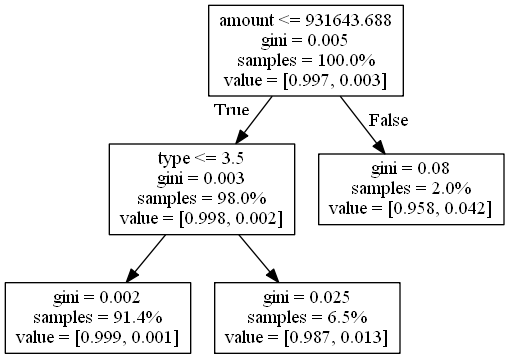

In [66]:
graph = pydotplus.graph_from_dot_data(data) 
Image(graph.create_png())